### **CASE STUDY: FASHION CLASS CLASSIFICATION**

### **STEP 1: PROBLEM STATEMENT AND BUSINESS CASE**

## Overview
The Fashion training set consists of 70,000 images divided into:
* **Training Samples:** 60,000
* **Testing Samples:** 10,000

## Dataset Sample
Each sample consists of:
* A **28x28 grayscale image**
* A **label** from 10 classes:
  1. **0:** T-shirt/top
  2. **1:** Trouser
  3. **2:** Pullover
  4. **3:** Dress
  5. **4:** Coat
  6. **5:** Sandal
  7. **6:** Shirt
  8. **7:** Sneaker
  9. **8:** Bag
  10. **9:** Ankle boot

## Image Characteristics
* **Image Size:** 28 pixels in height and 28 pixels in width
* **Total Pixels:** 784 pixels per image
* **Pixel Values:** Integer values between 0 and 255, representing the lightness or darkness of each pixel
  * **Higher values:** Darker pixels
  * **Lower values:** Lighter pixels

### **STEP 2: IMPORTING DATA**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fashion_train_df = pd.read_csv("fashion-mnist_train.csv",sep=',')

In [3]:
fashion_test_df = pd.read_csv('fashion-mnist_test.csv', sep = ',')

### **STEP 3: VISUALIZATION OF THE DATASET**

In [4]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
fashion_test_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9999,1,0,0,0,0,0,0,0,140,119,...,111,95,75,44,1,0,0,0,0,0


In [6]:
fashion_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
fashion_test_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9999,1,0,0,0,0,0,0,0,140,119,...,111,95,75,44,1,0,0,0,0,0


In [8]:
fashion_train_df.shape
fashion_test_df.shape
training = np.array(fashion_train_df, dtype = 'float32')
testing = np.array(fashion_test_df, dtype = 'float32')

np.float32(2.0)

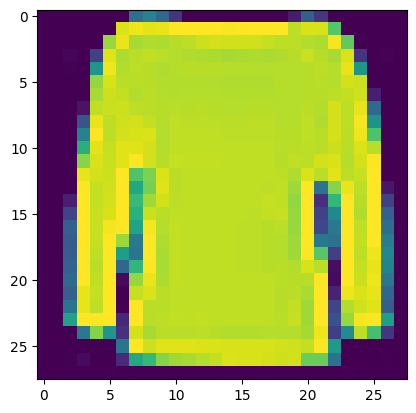

In [9]:
import random
i = random.randint(1, 60000)
plt.imshow(training[i, 1:].reshape(28, 28))
label = training[i, 0]
label

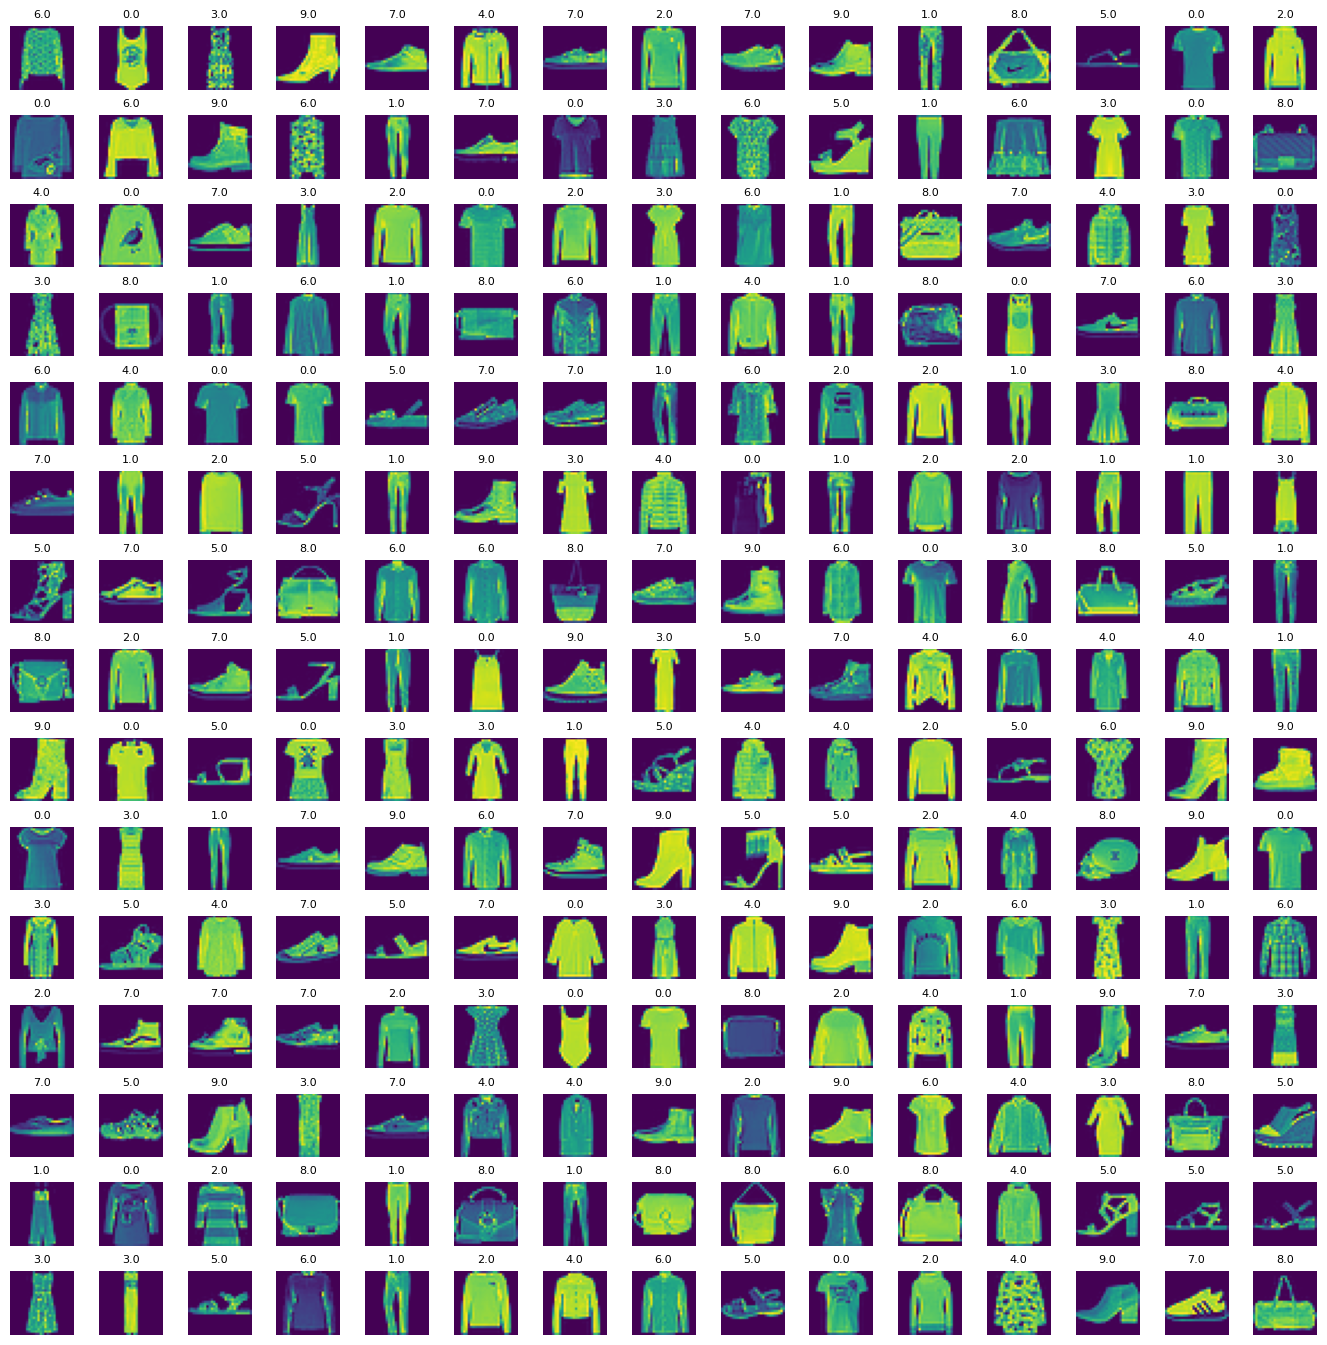

In [10]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid
W_grid = 15
L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize=(17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(training) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index
    axes[i].imshow( training[index,1:].reshape((28,28)) )
    axes[i].set_title(training[index,0], fontsize=8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

### **STEP 4: TRAINING THE MODEL**

In [11]:
X_train = training[:, 1:]/255
y_train = training[:, 0]

In [12]:
X_test = testing[:, 1:] / 255
y_test = testing[:,0]

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.2, random_state=12345)

In [14]:
X_train = X_train.reshape(X_train.shape[0], * (28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], * (28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], * (28, 28, 1))

In [15]:
print(X_train.shape)
print(y_train.shape)
print(X_validate.shape)
print(y_validate.shape)

(48000, 28, 28, 1)
(48000,)
(12000, 28, 28, 1)
(12000,)


In [16]:
import keras
import tensorflow as tf

In [17]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [18]:
cnn_model = Sequential()

In [19]:
cnn_model.add(Conv2D(32,3, 3, input_shape=(28,28,1), activation='relu'))

In [20]:
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

In [21]:
cnn_model.add(Flatten())

In [22]:
cnn_model.add(Dense(units=32, activation='relu'))

In [23]:
cnn_model.add(Dense(units=10, activation='sigmoid'))

In [24]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam' ,metrics=['accuracy'])

In [25]:
epochs = 50
batch_size = 512

cnn_model.fit(
    X_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(X_validate, y_validate)
)

Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 11s 100ms/step - accuracy: 0.3699 - loss: 1.8428 - val_accuracy: 0.7052 - val_loss: 0.8181
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 74ms/step - accuracy: 0.7306 - loss: 0.7581 - val_accuracy: 0.7668 - val_loss: 0.6437
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.7774 - loss: 0.6207 - val_accuracy: 0.7892 - val_loss: 0.5770
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.7979 - loss: 0.5607 - val_accuracy: 0.8049 - val_loss: 0.5333
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.8104 - loss: 0.5211 - val_accuracy: 0.8161 - val_loss: 0.5092
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.8191 - loss: 0.5008 - val_accuracy: 0.8253 - val_loss: 0.4842
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.8276 - loss: 0.4783 - val_accuracy: 0.8257 - val_loss: 0.4791
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.8309 - loss: 0.4683 - val_accuracy: 0.8347 -

### **STEP 5: EVALUATING THE MODEL**

In [26]:
evaluation = cnn_model.evaluate(X_test, y_test)
print(f'Test Accuracy : {evaluation[1]:.3f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8599 - loss: 0.3631
Test Accuracy : 0.867


In [27]:
predicted_classes = cnn_model.predict(X_test)
predicted_classes

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[9.99037802e-01, 1.03999469e-02, 6.75447583e-01, ...,
        6.02817067e-08, 1.87447757e-01, 2.44314808e-08],
       [1.81493443e-02, 9.99996483e-01, 2.06064899e-03, ...,
        8.53951647e-08, 1.26006473e-02, 2.61065852e-05],
       [9.61981475e-01, 3.45673319e-03, 9.92562473e-01, ...,
        6.80205119e-07, 1.01511450e-02, 2.28996669e-05],
       ...,
       [7.52790365e-04, 1.57289051e-05, 6.78313756e-03, ...,
        1.83264352e-02, 9.99511480e-01, 3.10420408e-03],
       [6.22327447e-01, 6.46213710e-04, 5.91586471e-01, ...,
        1.26857476e-05, 9.95649159e-01, 3.77310644e-05],
       [7.19621256e-02, 9.72837985e-01, 4.29950148e-01, ...,
        4.88102314e-09, 1.17217384e-01, 2.01679468e-05]], dtype=float32)

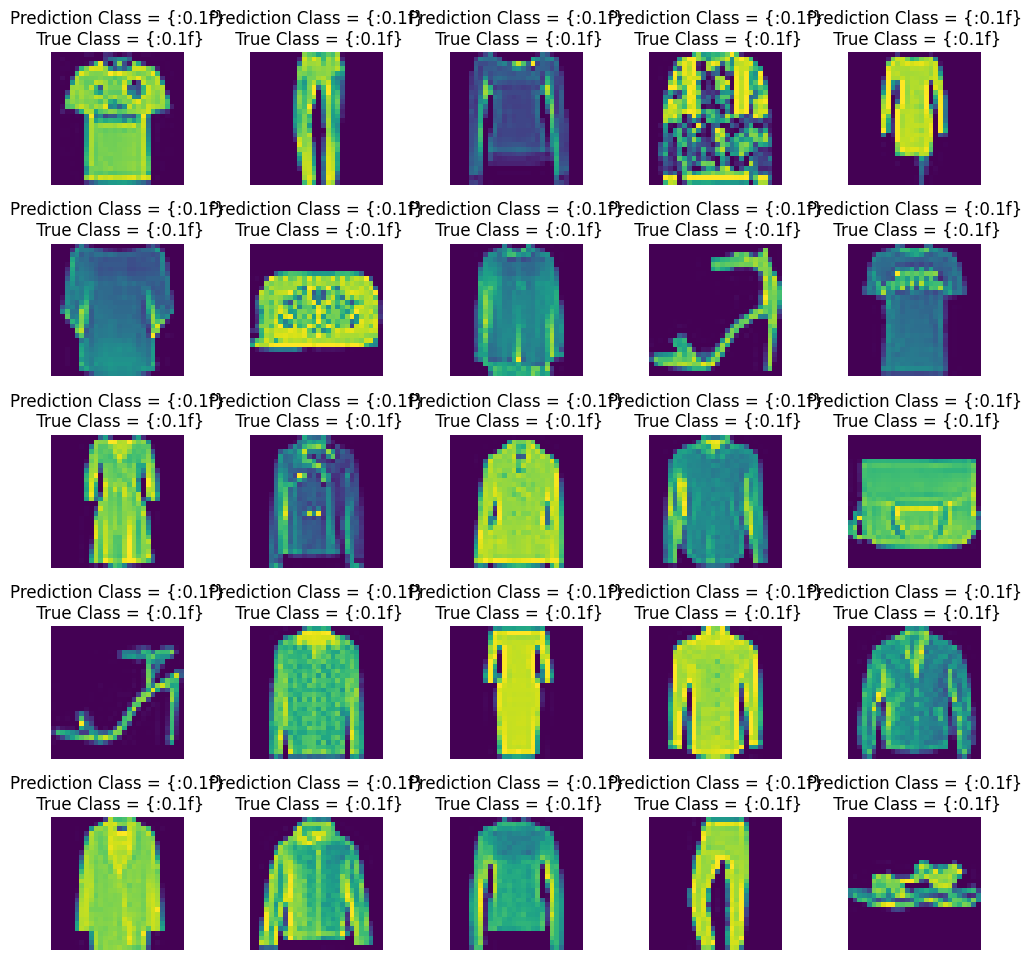

In [28]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

<Axes: >

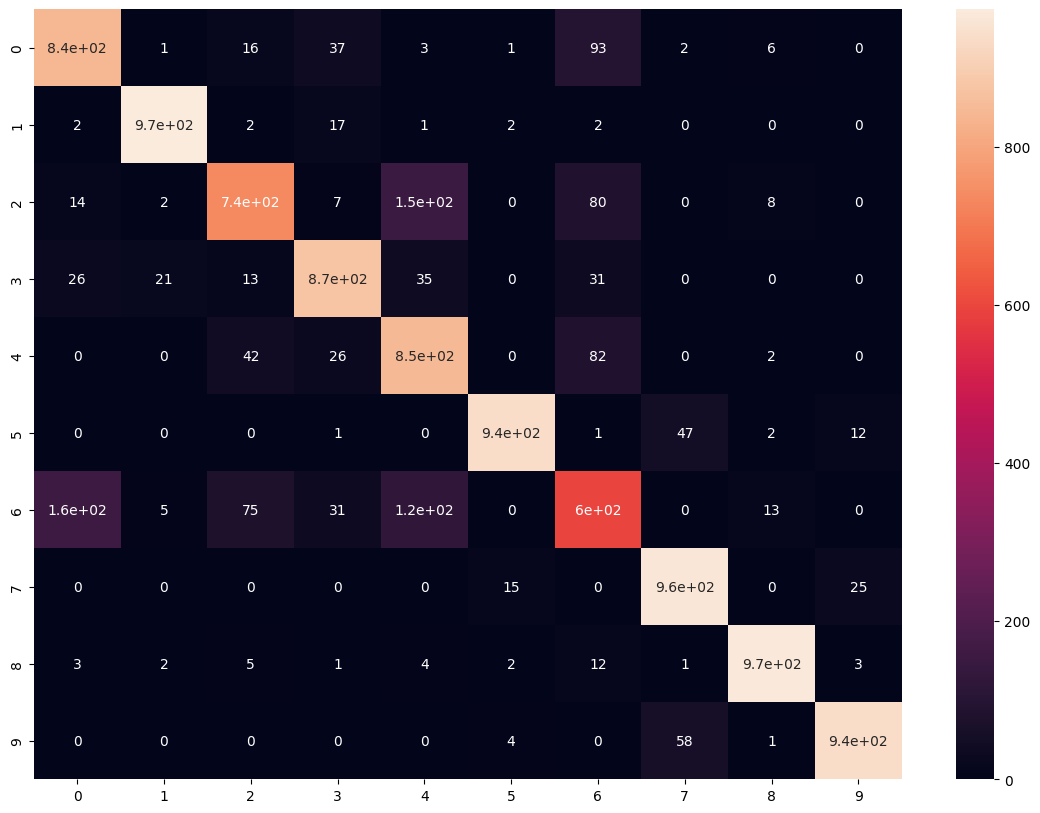

In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, np.argmax(predicted_classes, axis=1))
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)

In [30]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = [f"Class {i}" for i in range(num_classes)]

print(classification_report(y_test, np.argmax(predicted_classes, axis=1), target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.81      0.84      0.82      1000
     Class 1       0.97      0.97      0.97      1000
     Class 2       0.83      0.74      0.78      1000
     Class 3       0.88      0.87      0.88      1000
     Class 4       0.73      0.85      0.78      1000
     Class 5       0.98      0.94      0.96      1000
     Class 6       0.66      0.59      0.63      1000
     Class 7       0.90      0.96      0.93      1000
     Class 8       0.97      0.97      0.97      1000
     Class 9       0.96      0.94      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



### **CONCLUSION**
- Advaned techniques using more rich dataset can be used to analyses the color, texture and style besides the categorical classification.
- Deep Fashion Dataset: http://mmlab.ie.cuhk.edu.hk/projects/DeepFashion.html